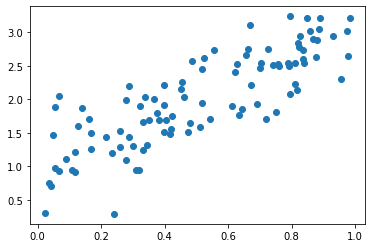

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.random.uniform(size=(100,1)) # (100,1)
noise = np.random.normal(size=(100,1))   # (100,1)
y_data = 2 * x_data + 1 + 0.4 * noise    # (100,1)   

plt.plot(x_data.reshape((-1,)), y_data.reshape((-1,)), 'o')
plt.show()

In [9]:
import tensorflow as tf
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (100,1)) # x <---- x_data
y = tf.placeholder(tf.float32, (100,1)) # y <---- y_data

init_beta = tf.keras.initializers.ones()
beta = tf.get_variable('beta', (1,1), tf.float32, init_beta)
print(beta) # <tf.Variable 'beta:0' shape=(1, 1) dtype=float32_ref>

y_pred = x @ beta # (100,1) @ (1,1) = (100,1) 

diff = y - y_pred # (100,1) - (100,1) = (100,1)
loss = tf.nn.l2_loss(diff)

g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    print(op.name, '-'*50)
    for tensor in op.inputs:
        print(tensor)
print()

g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    print(op.name, '-'*50)
    for tensor in op.outputs:
        print(tensor)

<tf.Variable 'beta:0' shape=(1, 1) dtype=float32_ref>
Placeholder --------------------------------------------------
Placeholder_1 --------------------------------------------------
beta/Initializer/ones --------------------------------------------------
beta --------------------------------------------------
beta/Assign --------------------------------------------------
Tensor("beta:0", shape=(1, 1), dtype=float32_ref)
Tensor("beta/Initializer/ones:0", shape=(1, 1), dtype=float32)
beta/read --------------------------------------------------
Tensor("beta:0", shape=(1, 1), dtype=float32_ref)
matmul --------------------------------------------------
Tensor("Placeholder:0", shape=(100, 1), dtype=float32)
Tensor("beta/read:0", shape=(1, 1), dtype=float32)
sub --------------------------------------------------
Tensor("Placeholder_1:0", shape=(100, 1), dtype=float32)
Tensor("matmul:0", shape=(100, 1), dtype=float32)
L2Loss --------------------------------------------------
Tensor("sub:0", sh

In [10]:
import tensorflow as tf
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (100,1)) # x <---- x_data
y = tf.placeholder(tf.float32, (100,1)) # y <---- y_data

init_beta = tf.keras.initializers.ones()
beta = tf.get_variable('beta', (1,1), tf.float32, init_beta)
print(beta) # <tf.Variable 'beta:0' shape=(1, 1) dtype=float32_ref>

y_pred = x @ beta # (100,1) @ (1,1) = (100,1) 

diff = y - y_pred # (100,1) - (100,1) = (100,1)
loss = tf.nn.l2_loss(diff)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    loss_run = sess.run(loss, feed_dict={x: x_data, y: y_data})
    print(loss_run)    

<tf.Variable 'beta:0' shape=(1, 1) dtype=float32_ref>
123.82466


In [12]:
((y_data - x_data)**2).sum()/2

123.82465714201723